In [1]:
import fetch_game
import baseball_events

### All game information can be returned in a single object

In [2]:
game_id, game = fetch_game.get_game_from_url('11-1-2017', 'HOU', 'LAD', 1)
game_id

'2017-11-01-HOU-LAD-1'

### Components of the game can be displayed individually

In [3]:
for key in sorted(game.__dict__.keys()):
    print(key)

away_batter_box_score_dict
away_pitcher_box_score_dict
away_team
away_team_stats
first_pitch_datetime
first_pitch_str
game_date_str
home_batter_box_score_dict
home_pitcher_box_score_dict
home_team
home_team_stats
inning_list
last_pitch_datetime
last_pitch_str
location


#### Individual inning:

In [4]:
game.inning_list[0]

-------------------------------- TOP OF INNING --------------------------------
InningStatsTuple(S=18, P=24, BB=0, K=0, LOB=0, E=1, H=1, R=2)
[
 Scorecard:      2B
 Hit location:   L7
 Pitcher:        21 Yu Darvish
 Batter:          4 George Springer
 Got on base:    True
 Fielding Error: None
 Out Runners:    []
 Scoring Runners:[]
 Runs Batted In: []
 Inning Outs:    0
 Summary:        Double
 Description:    George Springer doubles (3) on a line drive to left fielder Joc
                 Pederson.
 Events:
     - Pitch:                Ball                FF    96.0    (155.47, 160.83)
     - Pitch:                Called Strike       FC    83.9    (107.00, 171.09)
     - Pitch:                In play, no out     SL    83.9    (115.36, 183.10)
     -  4 George Springer:   Double                --->2B                      
, 
 Scorecard:      E3
 Hit location:   E3
 Pitcher:        21 Yu Darvish
 Batter:          2 Alex Bregman
 Got on base:    False
 Fielding Error: E3
 Out Runners:  

#### Plate appearance:

In [5]:
game.inning_list[4].top_half_appearance_list[0]


 Scorecard:      K
 Hit location:   None
 Pitcher:        22 Clayton Kershaw
 Batter:          4 George Springer
 Got on base:    False
 Fielding Error: None
 Out Runners:    []
 Scoring Runners:[]
 Runs Batted In: []
 Inning Outs:    1
 Summary:        Strikeout
 Description:    George Springer strikes out swinging.
 Events:
     - Pitch:                Called Strike       CU    72.7    (126.17, 167.58)
     - Pitch:                Foul                FF    93.6    (142.58, 176.48)
     - Pitch:                Foul                FF    94.1     (69.67, 167.92)
     - Pitch:                Swinging Strike     SL    89.5    (129.31, 153.95)

#### Plate appearance event list:

In [6]:
game.inning_list[4].top_half_appearance_list[0].event_list[0]

- Pitch:                Called Strike       CU    72.7    (126.17, 167.58)

### Analyze a game

In [7]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib

%matplotlib inline

In [8]:
pitch_tuple_list = []
for inning in game.inning_list:
    for appearance in inning.top_half_appearance_list:
        for event in appearance.event_list:
            if isinstance(event, baseball_events.Pitch):
                pitch_tuple_list.append(
                    (str(appearance.pitcher), 
                     event.pitch_description,
                     event.pitch_position,
                     event.pitch_speed,
                     event.pitch_type)
                )

In [9]:
data = pd.DataFrame(data=pitch_tuple_list, columns=['Pitcher', 'Pitch Description', 'Pitch Coordinate', 'Pitch Speed', 'Pitch Type'])
data

,Pitcher,Pitch Description,Pitch Coordinate,Pitch Speed,Pitch Type
0,21 Yu Darvish,Ball,"(155.47, 160.83)",96.0,FF
1,21 Yu Darvish,Called Strike,"(107.0, 171.09)",83.9,FC
2,21 Yu Darvish,"In play, no out","(115.36, 183.1)",83.9,SL
3,21 Yu Darvish,"In play, run(s)","(80.06, 168.03)",96.6,FF
4,21 Yu Darvish,Ball,"(54.1, 216.52)",84.6,SL
5,21 Yu Darvish,Called Strike,"(130.07, 187.18)",84.5,SL
6,21 Yu Darvish,Ball In Dirt,"(60.62, 0.0)",75.0,CU
7,21 Yu Darvish,"In play, run(s)","(58.63, 173.43)",84.7,SL
8,21 Yu Darvish,Swinging Strike,"(100.96, 184.09)",95.7,FF
9,21 Yu Darvish,Called Strike,"(127.58, 185.75)",84.7,SL


In [10]:
data['Pitcher'].value_counts()

22 Clayton Kershaw    51
21 Yu Darvish         47
57 Alex Wood          25
74 Kenley Jansen      20
17 Brandon Morrow      3
Name: Pitcher, dtype: int64

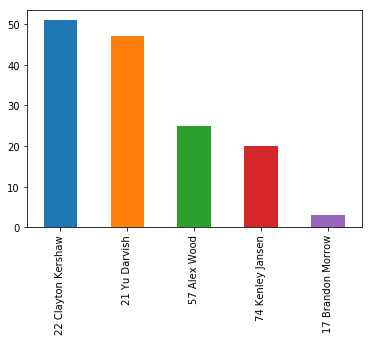

In [11]:
data['Pitcher'].value_counts().plot.bar()

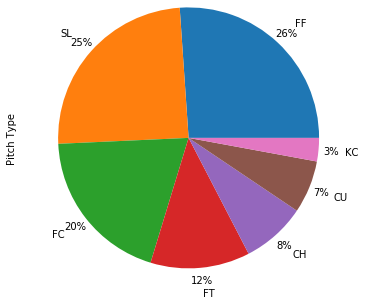

In [12]:
plt.axis('equal')
data['Pitch Type'].value_counts().plot(kind='pie', radius=1.5, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

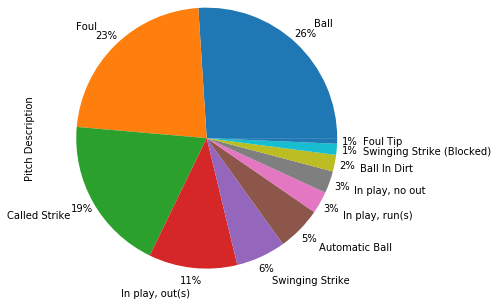

In [13]:
plt.axis('equal')
data['Pitch Description'].value_counts().plot(kind='pie', radius=1.5, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a20d438>]], dtype=object)

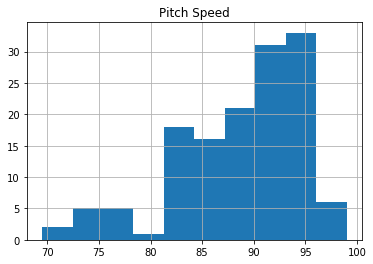

In [14]:
data.dropna(inplace=True)
data.count()
data.hist()

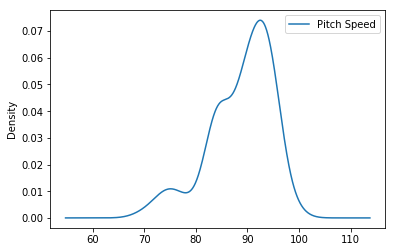

In [15]:
data.plot.kde()

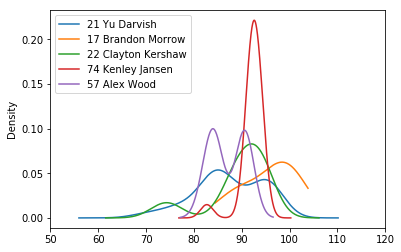

In [16]:
fig, ax = plt.subplots()
ax.set_xlim(50, 120)
for pitcher in data['Pitcher'].unique():
    s = data[data['Pitcher'] == pitcher]['Pitch Speed']
    s.plot.kde(ax=ax, label=pitcher)

ax.legend()

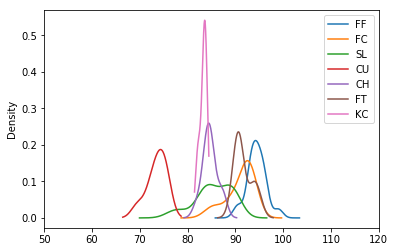

In [17]:
fig, ax = plt.subplots()
ax.set_xlim(50, 120)
for desc in data['Pitch Type'].unique():
    s = data[data['Pitch Type'] == desc]['Pitch Speed']
    s.plot.kde(ax=ax, label=desc)

ax.legend()

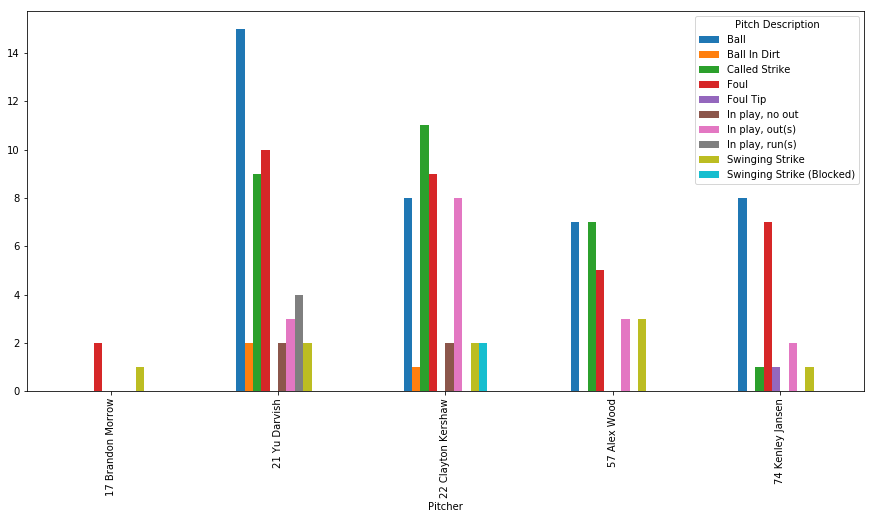

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Pitcher', 'Pitch Description']).size().unstack().plot.bar(ax=ax)

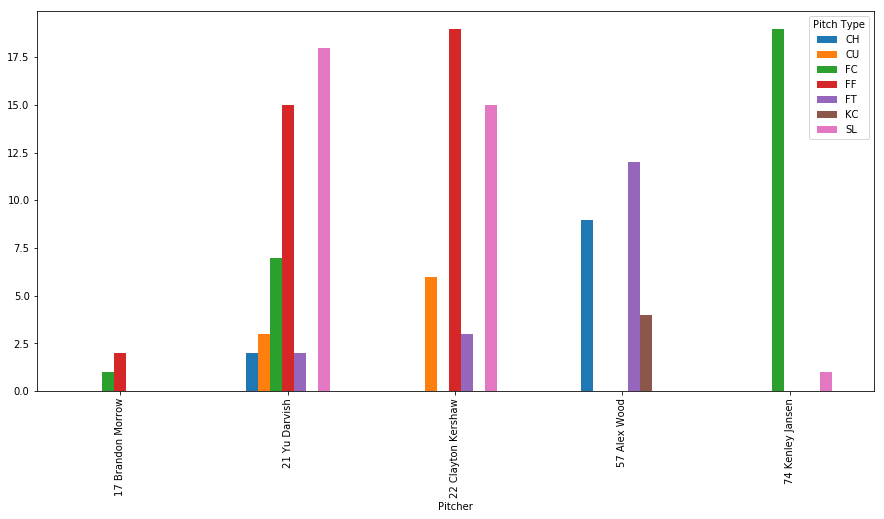

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Pitcher', 'Pitch Type']).size().unstack().plot.bar(ax=ax)

In [20]:
list(game.home_pitcher_box_score_dict)

[21 Yu Darvish,
 17 Brandon Morrow,
 22 Clayton Kershaw,
 74 Kenley Jansen,
 57 Alex Wood]

In [21]:
kenley_jansen = list(game.home_pitcher_box_score_dict)[3]

In [22]:
game.home_pitcher_box_score_dict[kenley_jansen]

PitcherBoxScore(IP=1.0, WLS='', BF=4, H=0, R=0, ER=0, SO=1, BB=1, IBB=0, HBP=0, BLK=0, WP=0, HR=0, S=12, P=20, ERA=0.0, WHIP=1.0)

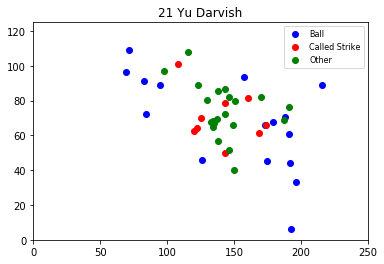

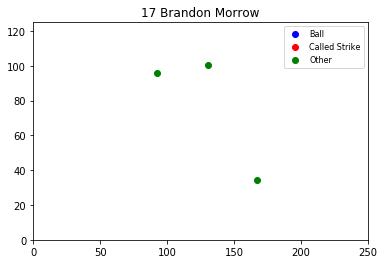

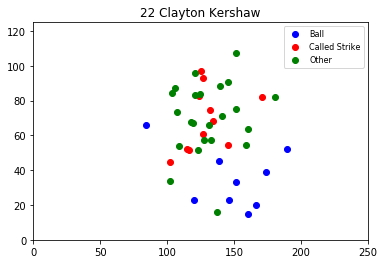

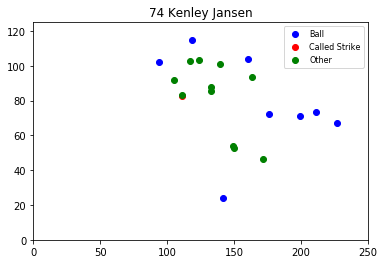

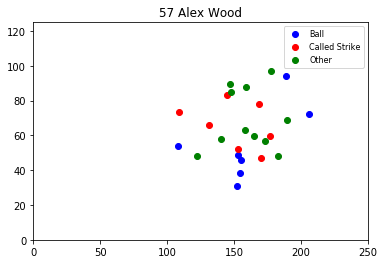

In [23]:
for pitcher in data['Pitcher'].unique():
    plt.ylim(0, 125)
    plt.xlim(0, 250)
    bx = [250 - x[2][0] for x in pitch_tuple_list if x[0] == pitcher if 'Ball' in x[1]]
    by = [250 - x[2][1] for x in pitch_tuple_list if x[0] == pitcher if 'Ball' in x[1]]
    cx = [250 - x[2][0] for x in pitch_tuple_list if x[0] == pitcher if 'Called Strike' in x[1]]
    cy = [250 - x[2][1] for x in pitch_tuple_list if x[0] == pitcher if 'Called Strike' in x[1]]
    ox = [250 - x[2][0] for x in pitch_tuple_list if x[0] == pitcher if ('Ball' not in x[1] and 'Called Strike' not in x[1])]
    oy = [250 - x[2][1] for x in pitch_tuple_list if x[0] == pitcher if ('Ball' not in x[1] and 'Called Strike' not in x[1])]
    b = plt.scatter(bx, by, c='b')
    c = plt.scatter(cx, cy, c='r')
    o = plt.scatter(ox, oy, c='g')

    plt.legend((b, c, o),
               ('Ball', 'Called Strike', 'Other'),
               scatterpoints=1,
               loc='upper right',
               ncol=1,
               fontsize=8)

    plt.title(pitcher)
    plt.show()

### Analyze a player's season

In [ ]:
game_list_2017 = fetch_game.get_game_list_from_file_range('1-1-2017', '12-31-2017', '/Users/benjamincrom/repos/livebaseballscorecards-artifacts/baseball_files')
len(game_list_2017)

In [ ]:
pitch_tuple_list_2 = []
for game_id, game in game_list_2017:
    if game.home_team.name == 'Atlanta Braves' or game.away_team.name == 'Atlanta Braves':
        for inning in game.inning_list:
            for appearance in inning.top_half_appearance_list:
                if 'Dickey' in str(appearance.pitcher):
                    for event in appearance.event_list:
                        if isinstance(event, baseball_events.Pitch):
                            pitch_tuple_list_2.append(
                                (str(appearance.pitcher), 
                                 event.pitch_description,
                                 event.pitch_position,
                                 event.pitch_speed,
                                 event.pitch_type)
                            )

len(pitch_tuple_list_2)

In [ ]:
df = pd.DataFrame(data=pitch_tuple_list_2, columns=['Pitcher', 'Pitch Description', 'Pitch Coordinate', 'Pitch Speed', 'Pitch Type'])
df['Pitch Type'].value_counts().plot.bar()

In [ ]:
plt.axis('equal')
df['Pitch Description'].value_counts().plot(kind='pie', radius=2, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.ylabel('')
plt.show()

In [ ]:
df.dropna(inplace=True)
ax.set_xlim(50, 100)
df.plot.kde()
ax.legend()

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(50, 100)
for desc in df['Pitch Type'].unique():
    if desc != 'PO':
        s = df[df['Pitch Type'] == desc]['Pitch Speed']
        s.plot.kde(ax=ax, label=desc)

ax.legend()

### Analyze a lineup of pitchers

In [ ]:
import datetime
import dateutil.parser
import pytz
pitch_tuple_list_3 = []
for game_id, game in game_list_2017:
    if game.home_team.name == 'Atlanta Braves' and dateutil.parser.parse(game.game_date_str) > datetime.datetime(2017, 3, 31):
        for inning in game.inning_list:
            for appearance in inning.top_half_appearance_list:
                pitch_tuple_list_3.append(
                    (str(appearance.pitcher),
                     str(appearance.batter),
                     len(appearance.out_runners_list),
                     len(appearance.scoring_runners_list),
                     len(appearance.runners_batted_in_list),
                     appearance.scorecard_summary,
                     appearance.got_on_base,
                     appearance.plate_appearance_summary,
                     appearance.plate_appearance_description,
                     appearance.error_str,
                     appearance.inning_outs)
                )
    if game.away_team.name == 'Atlanta Braves' and dateutil.parser.parse(game.game_date_str) > datetime.datetime(2017, 3, 31):
        for inning in game.inning_list:
            if inning.bottom_half_appearance_list:
                for appearance in inning.bottom_half_appearance_list:
                    pitch_tuple_list_3.append(
                        (str(appearance.pitcher),
                         str(appearance.batter),
                         len(appearance.out_runners_list),
                         len(appearance.scoring_runners_list),
                         len(appearance.runners_batted_in_list),
                         appearance.scorecard_summary,
                         appearance.got_on_base,
                         appearance.plate_appearance_summary,
                         appearance.plate_appearance_description,
                         appearance.error_str,
                         appearance.inning_outs)
                    )

df3 = pd.DataFrame(data=pitch_tuple_list_3, columns=['Pitcher',
                                                     'Batter',
                                                     'Out Runners',
                                                     'Scoring Runners',
                                                     'RBIs',
                                                     'Scorecard',
                                                     'On-base?',
                                                     'Plate Summary',
                                                     'Plate Description',
                                                     'Error',
                                                     'Inning Outs'])

df3

In [ ]:
for pitcher in df3['Pitcher'].unique():
    s = df3[df3['Pitcher'] == pitcher]['Plate Summary'].value_counts()
    if s[0] > 100:
        fig, ax = plt.subplots()
        ax.set_ylim(0, 250)
        s.plot.bar()
        plt.title(pitcher)
        plt.show()


In [ ]:
x = []
for pitcher in df3['Pitcher'].unique():
    #f = df3[df3['Pitcher'] == pitcher]['On-base?'].value_counts()[0]
    s = df3[df3['Pitcher'] == pitcher]['On-base?'].value_counts()
    if len(s) == 2:
        f = s[0]
        t = s[1]
        x.append((str(pitcher), f, t))

df4 = pd.DataFrame(data=x, columns=['Pitcher',
                                    'Did not get on base',
                                    'Got on base'])


In [ ]:
df4.index = df4['Pitcher']
df4.sort_values(by=['Got on base']).nlargest(10, 'Did not get on base').plot.bar()

In [ ]:
x = []
for batter in df3['Batter'].unique():
    s = df3[df3['Batter'] == batter]['On-base?']
    if True in s.value_counts():
        t = s.value_counts()[True]
    else:
        t = 0

    if False in s.value_counts():
        f = s.value_counts()[False]
    else:
        f = 0        

    if f != 0:
        success = t / f
    else:
        success = None

    if f:
        x.append((str(batter), success, t, f))

df5 = pd.DataFrame(data=x, columns=['Batter',
                                    'Success',
                                    'Got on base',
                                    'Did not get on base'])


In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.ylim(0, 70)
plt.xlim(0, 70)

lims = [0, 70]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set(xlabel="Failed to get on base", ylabel="Got on base")

t = df5['Got on base']
f = df5['Did not get on base']
b = plt.scatter(f, t, c='b')
plt.show()

df5.sort_values('Got on base', ascending=False)

In [ ]:
import fetch_game
game_list_gen = fetch_game.get_game_generator_from_file_range('1-1-2016', '12-31-2017', '/Users/benjamincrom/repos/livebaseballscorecards-artifacts/baseball_files')

In [ ]:
next(game_list_gen)